Delete all variables in the current environment (if you have already run some cells) - clean state

In [16]:
%reset

Import all necessary packages

In [17]:
import pandas as pd
import os
import networkx as nx
from matplotlib import pyplot as plt

Replace with the path to the root folder of the project

In [18]:
rootdir_path = '/home/andreistoica12/research-internship'

Replace with the path to the folder where we store the dataset

In [19]:
data_path = '/home/andreistoica12/research-internship/WICO'

Create a dictionary with all nodes - tweets along with their id, the number of friends and followers of the user who posted it. It may be useful further down the line when seeking statistics about users.

In [23]:
data = {}
for category in os.listdir(data_path):
    category_path = os.path.join(data_path, category)
    data['df_'+category] = pd.DataFrame()
    for subset in os.listdir(category_path):
        subset_path = os.path.join(category_path, subset)
        df_subset_nodes = pd.read_csv(subset_path + '/nodes.csv')
        data['df_'+category] = pd.concat([data['df_'+category], df_subset_nodes], axis=0)
    data['df_'+category].drop(['time'], axis=1, inplace=True)
    data['df_'+category].drop_duplicates(inplace=True)

In [24]:
data['df_5G_Conspiracy_Graphs']

,id,friends,followers
0,685792319,10,12
1,91886213,11,10
2,217180773,9,10
3,186555251,11,9
4,39657063,10,10
...,...,...,...
47,174547051,10,7
48,814942138,8,7
50,102988826,12,14
51,58068165,10,8


Save the dataframe associated with all nodes for 5G misinformation to a .csv file.

In [10]:
data['df_5G_Conspiracy_Graphs'].to_csv("/home/andreistoica12/research-internship/files/5G_all_nodes.csv", index=False)

In [11]:
G = nx.read_edgelist("/home/andreistoica12/research-internship/WICO/5G_Conspiracy_Graphs/1/edges.txt", create_using=nx.DiGraph)

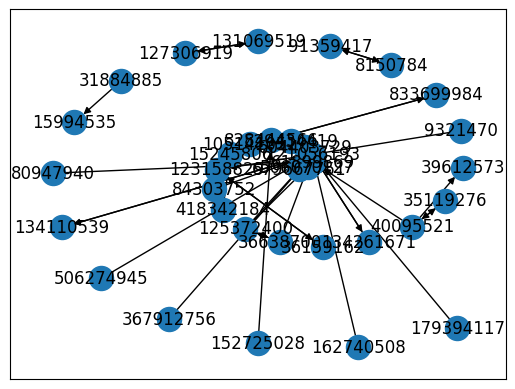

In [12]:
nx.draw_networkx(G, pos=nx.spiral_layout(G))
plt.show()